/tmp/ipykernel_7264/527581585.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce')
/tmp/ipykernel_7264/527581585.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['time'] = pd.to_datetime(df2['time'], errors='coerce')


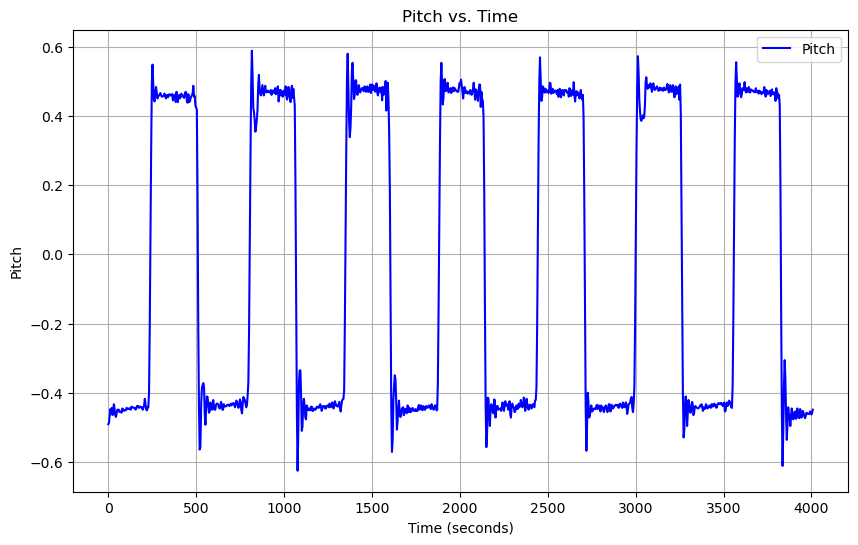

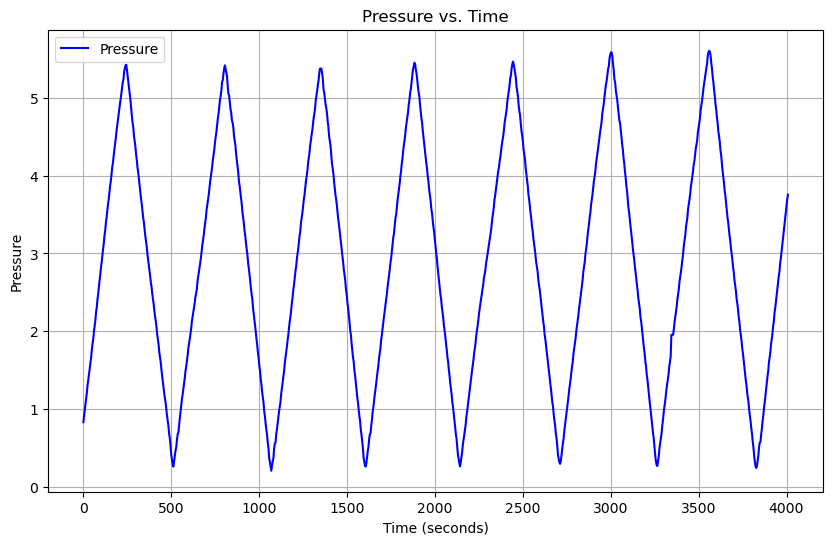

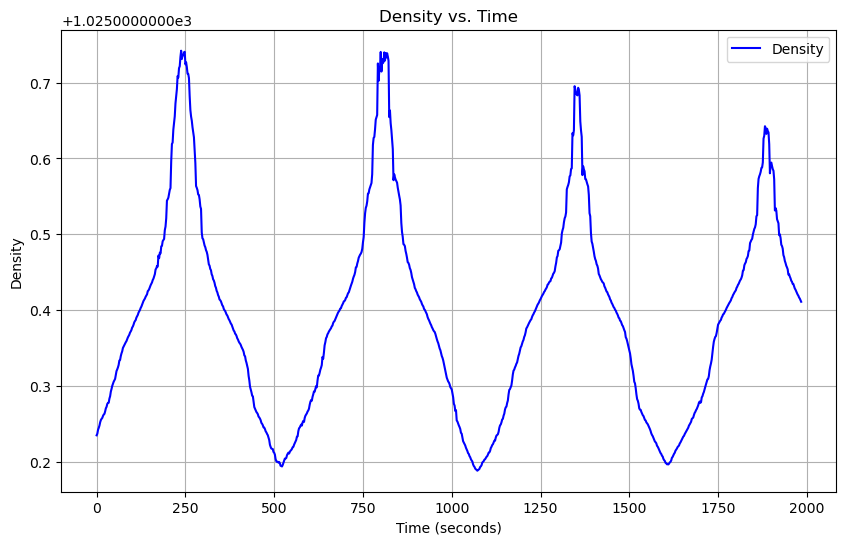

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file, specify dtype for problematic columns, and handle date parsing explicitly
df = pd.read_csv(
    'maracoos_01-20240124T1612-trajectory-raw-delayed_f099_da4d_91e4.csv',
    low_memory=False  # Prevent mixed type warning
)


df2 = pd.read_csv(
    'maracoos_01-20240124T1612-profile-sci-delayed_20f3_260a_197e.csv',
    low_memory=False  # Prevent mixed type warning
)


df2

# Convert 'time' column to datetime, specify format if known
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Drop rows where 'time' could not be parsed or 'm_pitch'/'m_pressure' are NaN
df.dropna(subset=['time', 'm_pitch', 'm_pressure'], inplace=True)

# Convert 'time' column to datetime, specify format if known
df2['time'] = pd.to_datetime(df2['time'], errors='coerce')

# Drop rows where 'time' could not be parsed or 'm_pitch'/'m_pressure' are NaN
df2.dropna(subset=['time', 'density'], inplace=True)

# Convert time to seconds since the first timestamp
df['time_seconds'] = (df['time'] - df['time'].iloc[0]).dt.total_seconds()
df2['time_seconds'] = (df2['time'] - df2['time'].iloc[0]).dt.total_seconds()




# Transform columns to float type
df['time_seconds'] = df['time_seconds'].astype(float)
df['m_pitch'] = df['m_pitch'].astype(float)
df['m_pressure'] = df['m_pressure'].astype(float)

df2['time_seconds'] = df2['time_seconds'].astype(float)
df2['density'] = df2['density'].astype(float)


# Convert the selected columns to a NumPy array
array_data = df[['time_seconds', 'm_pitch', 'm_pressure']].to_numpy()
array_data2 = df2[['time_seconds', 'density']].to_numpy()


# # Ensure 'm_pitch' is not multi-dimensional
# df['m_pitch'] = df['m_pitch'].astype(float)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(array_data[:1000,0], array_data[:1000,1], label='Pitch', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Pitch')
plt.title('Pitch vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(array_data[:1000,0], array_data[:1000,2], label='Pressure', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure')
plt.title('Pressure vs. Time')
plt.legend()
plt.grid(True)
plt.show()


# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.plot(array_data2[:1000,0], array_data2[:1000,1], label='Density', color='blue')
# plt.xlabel('Time (seconds)')
# plt.ylabel('Density')
# plt.title('Density vs. Time')
# plt.legend()
# plt.grid(True)
# plt.show()
